<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [2]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
# %pip install -U "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install -U CompStats

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [3]:
try:
  import CompStats
except ImportError:
    %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance_multiple_metrics` function is used to calculate and analyze the performance of machine learning models for the multimetric case. On the other hand, the `plot_performance_multiple` function visualizes the performance metrics calculated by `performance_multiple_metrics`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference_multiple` and `plot_difference_multiple`; `difference_multiple` assesses the differences in performance between models in comparison to the best system for each metric, and `plot_difference_multiple` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [4]:
from CompStats import performance_multiple_metrics, plot_performance_multiple
from CompStats import difference_multiple, plot_difference_multiple
from CompStats import all_differences_multiple
#from CompStats import difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
import os
# DATA = "C:\\Users\\Sergio Nava\\Documentos\\GitHub\\INGEOTEC\\CompStats\\CompStats\\tests\\data.csv"
#DATA = '/Users/nava/Documents/GitHub/DCCD/CompStats/CompStats/tests/data.csv'


`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [6]:
#DATA = 'detoxis_subtask1'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
#DATA = 'exist_task1_en_l'
#metrics = [
#    {"func": accuracy_score,  'BiB': True}
#    ]
DATA = 'MeOffendEs_subtask3'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
metrics = [
    {"func": f1_score, "args": {"average": "macro"}, 'BiB': True},
    {"func": accuracy_score, 'BiB': True},
    {"func": precision_score, 'BiB': True}
    ]
#DATA = 'RES-MEX2021_recomendation'
#metrics = [
#    {"func": mean_absolute_error,  'BiB': False}
#    ]
#DATA = 'PARMEX_2022'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
df = pd.read_csv(DATA+'.csv')
print(df.head())

perf = performance_multiple_metrics(df, "y", metrics,num_samples=5)

   y  aomar  CEN-Amrita  CIC-IPN  CIMAT-GTO  CIMAT-MTY-GTO  DCCD-INFOTEC  \
0  0      1           1        0          0              0             0   
1  0      1           1        1          0              0             1   
2  1      1           1        1          0              1             1   
3  0      1           1        0          0              0             0   
4  1      1           1        1          1              1             1   

   NLP-CIC  Timen  UMUTeam  xjywing  
0        0      0        0        1  
1        0      0        0        1  
2        0      1        1        1  
3        0      0        0        1  
4        1      1        1        1  


In [7]:
import pickle

# Suponiendo que tienes un objeto "perf"
#perf = {"nombre": "Ejemplo", "valor": 10}

#print(perf)
# Almacenar el objeto en un archivo
with open(DATA+".dat", "wb") as archivo:
    pickle.dump(perf, archivo)

# Recuperar el objeto del archivo
with open(DATA+".dat", "rb") as archivo:
    perf_recuperado = pickle.load(archivo)

#print(perf_recuperado)

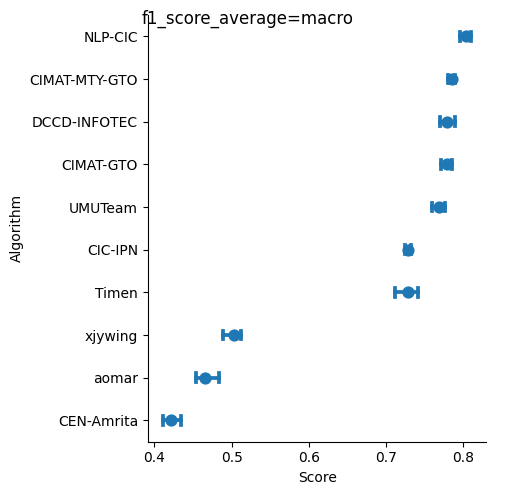

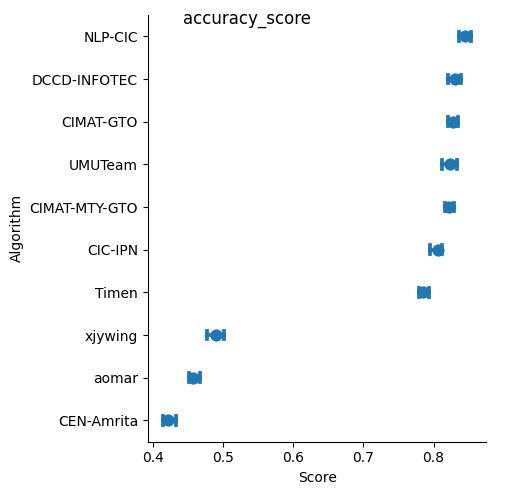

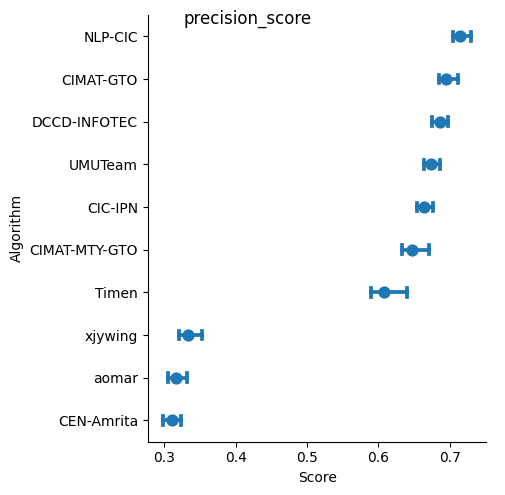

In [8]:
face_grid = plot_performance_multiple(perf_recuperado)

In [44]:

# Supongamos que perf_recuperado['samples'] es tu lista de listas
lista_de_listas = perf_recuperado['samples']
print(lista_de_listas)

{'f1_score_average=macro': {'aomar': array([0.45486814, 0.45337175, 0.47114495, 0.46158097, 0.48463295]), 'CEN-Amrita': array([0.42020652, 0.42348507, 0.43516064, 0.41024661, 0.42096263]), 'CIC-IPN': array([0.72699042, 0.73185901, 0.72575787, 0.72494612, 0.73269592]), 'CIMAT-GTO': array([0.77749843, 0.77548845, 0.77115197, 0.78426912, 0.78607639]), 'CIMAT-MTY-GTO': array([0.7902458 , 0.78233191, 0.78771484, 0.78034546, 0.78688374]), 'DCCD-INFOTEC': array([0.7695254 , 0.7901012 , 0.77682861, 0.78024959, 0.7809719 ]), 'NLP-CIC': array([0.80738888, 0.81053817, 0.79934876, 0.80199546, 0.79579549]), 'Timen': array([0.7310897 , 0.74245211, 0.72563849, 0.71064219, 0.73164405]), 'UMUTeam': array([0.75954206, 0.76939064, 0.76429323, 0.77044053, 0.77751412]), 'xjywing': array([0.50297714, 0.48674543, 0.5061542 , 0.50612933, 0.51292297])}, 'accuracy_score': {'aomar': array([0.46770499, 0.45258818, 0.45396244, 0.45121393, 0.4644984 ]), 'CEN-Amrita': array([0.43426477, 0.41868988, 0.42052222, 0.414

In [51]:

# Crear un diccionario de DataFrames
lista_de_dataframes = {}

for metrica, competidores_dict in lista_de_listas.items():
    # Crear un DataFrame a partir del diccionario de competidores
    df_temp = pd.DataFrame.from_dict(competidores_dict, orient='index')
    df_temp.index.name = 'Competidor'
    df_temp.reset_index(inplace=True)  # Convertir el índice en una columna
    print(df_temp)
    
    # Renombrar las columnas para que la primera columna sea la métrica
    df_temp.columns = ['Competidor'] + [metrica] * df_temp.shape[1]  # Repite el nombre de la métrica para todas las columnas
    lista_de_dataframes[metrica] = df_temp  # Almacenar en el diccionario

# Mostrar el DataFrame para 'f1_score_average=macro'
print(lista_de_dataframes['f1_score_average=macro'])

      Competidor         0         1         2         3         4
0          aomar  0.454868  0.453372  0.471145  0.461581  0.484633
1     CEN-Amrita  0.420207  0.423485  0.435161  0.410247  0.420963
2        CIC-IPN  0.726990  0.731859  0.725758  0.724946  0.732696
3      CIMAT-GTO  0.777498  0.775488  0.771152  0.784269  0.786076
4  CIMAT-MTY-GTO  0.790246  0.782332  0.787715  0.780345  0.786884
5   DCCD-INFOTEC  0.769525  0.790101  0.776829  0.780250  0.780972
6        NLP-CIC  0.807389  0.810538  0.799349  0.801995  0.795795
7          Timen  0.731090  0.742452  0.725638  0.710642  0.731644
8        UMUTeam  0.759542  0.769391  0.764293  0.770441  0.777514
9        xjywing  0.502977  0.486745  0.506154  0.506129  0.512923


ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [36]:
    
# Convertir cada lista en un DataFrame y almacenarlos en una lista
lista_de_dataframes = [pd.DataFrame(lista_de_listas[data]) for data in lista_de_listas]

print(lista_de_dataframes[0])


      aomar  CEN-Amrita   CIC-IPN  CIMAT-GTO  CIMAT-MTY-GTO  DCCD-INFOTEC  \
0  0.454868    0.420207  0.726990   0.777498       0.790246      0.769525   
1  0.453372    0.423485  0.731859   0.775488       0.782332      0.790101   
2  0.471145    0.435161  0.725758   0.771152       0.787715      0.776829   
3  0.461581    0.410247  0.724946   0.784269       0.780345      0.780250   
4  0.484633    0.420963  0.732696   0.786076       0.786884      0.780972   

    NLP-CIC     Timen   UMUTeam   xjywing  
0  0.807389  0.731090  0.759542  0.502977  
1  0.810538  0.742452  0.769391  0.486745  
2  0.799349  0.725638  0.764293  0.506154  
3  0.801995  0.710642  0.770441  0.506129  
4  0.795795  0.731644  0.777514  0.512923  


In [42]:
# Combinar todos los DataFrames en uno solo
df_final = pd.DataFrame({ 'Competidor': np.tile(lista_de_dataframes[0].columns, len(lista_de_dataframes[0])), 'System': lista_de_dataframes[0].values.ravel()})


for df in lista_de_dataframes[1:]:
    df1 = pd.DataFrame({ 'Competidor': np.tile(df.columns, len(df)), 'System': df.values.ravel()})

    df_final = pd.merge(df_final, df1, on='Competidor', how='outer')
    print(df1)

# Mostrar el DataFrame final
print(df_final)

       Competidor    System
0           aomar  0.467705
1      CEN-Amrita  0.434265
2         CIC-IPN  0.809437
3       CIMAT-GTO  0.825470
4   CIMAT-MTY-GTO  0.825011
5    DCCD-INFOTEC  0.819973
6         NLP-CIC  0.836464
7           Timen  0.784242
8         UMUTeam  0.813101
9         xjywing  0.502519
10          aomar  0.452588
11     CEN-Amrita  0.418690
12        CIC-IPN  0.804856
13      CIMAT-GTO  0.826844
14  CIMAT-MTY-GTO  0.819056
15   DCCD-INFOTEC  0.839670
16        NLP-CIC  0.853871
17          Timen  0.786074
18        UMUTeam  0.830050
19        xjywing  0.477325
20          aomar  0.453962
21     CEN-Amrita  0.420522
22        CIC-IPN  0.793404
23      CIMAT-GTO  0.819973
24  CIMAT-MTY-GTO  0.815392
25   DCCD-INFOTEC  0.827760
26        NLP-CIC  0.839212
27          Timen  0.779661
28        UMUTeam  0.812185
29        xjywing  0.493358
30          aomar  0.451214
31     CEN-Amrita  0.414567
32        CIC-IPN  0.809895
33      CIMAT-GTO  0.831425
34  CIMAT-MTY-GTO  0

In [26]:
for df in lista_de_dataframes:
    # Crear listas para almacenar los datos
    metricas = []
    competidores = []
    valores = []

    # Iterar sobre las métricas y competidores
    for metrica, competidores_dict in df.items():
        print(metrica)
        print(competidores_dict)
        for competidor, valor_array in competidores_dict.items():
            # Para cada competidor, añadir los valores a las listas
            for valor in valor_array:
                metricas.append(metrica)
                competidores.append(competidor)
                valores.append(valor)

    # Crear el DataFrame
    df = pd.DataFrame({
        'Metrica': metricas,
        'Competidor': competidores,
        'Valor': valores
        })

print(df)

aomar
0    0.454868
1    0.453372
2    0.471145
3    0.461581
4    0.484633
Name: aomar, dtype: float64


TypeError: 'float' object is not iterable

In [38]:
import plotly.express as px
#df = px.data.iris()
for df in lista_de_dataframes:
    df1 = pd.DataFrame({ 'System': np.tile(df.columns, len(df)), 'value': df.values.ravel()})
    fig = px.scatter_matrix(df1,
                             color="System")
    fig.show()


In [ ]:
#%pip install nbformat --upgrade
#%pip install -U plotly

In [9]:
diff = difference_multiple(perf) 

In [ ]:
for metric, diffs in diff['winner'].items():
    print(f"For {metric} the best performing system is {diffs['best']}")

In [ ]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['CI'].items():
        print(f"CI for {key} {value}")


In [ ]:
face_grid_diff = plot_difference_multiple(diff)

In [ ]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference with {key} {value}")

In [ ]:
correction = 'bonferroni'
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')

In [15]:
all_diff = all_differences_multiple(perf)


In [ ]:
all_diff['compg']

In [ ]:
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric} ")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference {key} {value}")

In [ ]:
correction = 'bonferroni'
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')